## Help Twitter Combat Hate Speech Using NLP and ML


Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium to spread hate.

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

Analysis to be done: Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

Content:

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet

Tasks:

1, Load the tweets file using read_csv function from Pandas package.

2, Get the tweets into a list for easy text cleanup and manipulation.

To cleanup:

--- Normalize the casing.

--- Using regular expressions, remove user handles. These begin with '@’.

--- Using regular expressions, remove URLs.

--- Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.

--- Remove stop words.

--- Remove redundant terms like ‘amp’, ‘rt’, etc.

--- Remove ‘#’ symbols from the tweet while retaining the term.

(4), Extra cleanup by removing terms with a length of 1.

(5), Check out the top terms in the tweets:

--- First, get all the tokenized terms into one large list.

--- Use the counter and find the 10 most common terms.

(6), Data formatting for predictive modeling:

---Join the tokens back to form strings. This will be required for the vectorizers.

---Assign x and y.

---Perform train_test_split using sklearn.

(7), We’ll use TF-IDF values for the terms as a feature to get into a vector space model.

---Import TF-IDF vectorizer from sklearn.

---Instantiate with a maximum of 5000 terms in your vocabulary.

---Fit and apply on the train set.

---Apply on the test set.

(8), Model building: Ordinary Logistic Regression

---Instantiate Logistic Regression from sklearn with default parameters.

---Fit into the train data.

---Make predictions for the train and the test set.

(9), Model evaluation: Accuracy, recall, and f_1 score.

Report the accuracy on the train set.

---Report the recall on the train set: decent, high, or low.

---Get the f1 score on the train set.

(10), Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.

---Adjust the appropriate class in the LogisticRegression model.

(11), Train again with the adjustment and evaluate.

---Train the model on the train set.

---Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

(12), Regularization and Hyperparameter tuning:

---Import GridSearch and StratifiedKFold because of class imbalance.

---Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.

---Use a balanced class weight while instantiating the logistic regression.

(13), Find the parameters with the best recall in cross-validation.

---Choose ‘recall’ as the metric for scoring.

---Choose a stratified 4 fold cross-validation scheme.

---Fit into the train set.

(14), What are the best parameters?

(15), Predict and evaluate using the best estimator.

---Use the best estimator from the grid search to make predictions on the test set.

---What is the recall on the test set for the toxic comments?

---What is the f_1 score?


### import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

import nltk
from nltk.tokenize import TweetTokenizer
import re
import string
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemme
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
# import nltk
# nltk.download('all')

## 1. Load tweets file using read_csv function from Pandas

In [ ]:
# Import dataset
Twitter_Data = pd.read_csv('TwitterHate.csv')
Twitter_Data.shape

(31962, 3)

In [ ]:
Twitter_Data.head(3)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty


In [ ]:
# Retain only neccessary columns
Twitter_Data = Twitter_Data[['label','tweet']]
Twitter_Data.shape

(31962, 2)

In [ ]:
Twitter_Data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
def preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    corpus = []
    for tweet in data:

        review = re.sub(r"@[A-Za-z0-9_]+", " ", tweet)
        review = re.sub('RT', ' ', review)
        review = re.sub(r"https?://[A-Za-z0-9./]+", " ", review)
        review = re.sub(r"https?", " ", review)
        review = re.sub('[^a-zA-Z]', ' ', review)
        review = review.lower()
        review = review.split()
        ps = PorterStemmer()
        review = [ps.stem(word) for word in review if not word in set(all_stopwords) if len(word) > 2]
        review = ' '.join(review)
        corpus.append(review)

    return np.array(corpus)

In [ ]:
Twitter_Data['cleen_tweet'] = preprocessing(Twitter_Data['tweet'].values)

In [ ]:
Twitter_Data.head()

,label,tweet,cleen_tweet
0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit use caus offer wheelchair va...
2,0,bihday your majesty,bihday majesti
3,0,#model i love u take with u all the time in ...,model love take time
4,0,factsguide: society now #motivation,factsguid societi motiv


###  Data formatting for predictive modeling

In [ ]:
X = Twitter_Data.cleen_tweet
y = Twitter_Data.label

print(X.shape)
print(y.shape)

(31962,)
(31962,)


####  Perform train_test_split using sklearn

In [ ]:
# split X and y into training ans testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23971,)
(7991,)
(23971,)
(7991,)


###  Use TF-IDF values for the terms as a feature to get into a vector space model

#### 1. Import TF-IDF vectorizer from sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#### 2. Instantiate with a maximum of 5000 terms in your vocabulary

In [ ]:
# instantiate the vectorizer
vect_tfidf = TfidfVectorizer(analyzer='word')

#### 3. Fit and apply on the train set

In [ ]:
vect_tfidf.fit(X_train)
X_train_tfidf_dtm = vect_tfidf.transform(X_train)

In [ ]:
# create a dataframe
feature_names = vect_tfidf.get_feature_names_out ()
pd.DataFrame(X_train_tfidf_dtm.toarray(), columns=feature_names)

,aaa,aaaaa,aaaaaand,aaaaah,aaaaand,aaahh,aaahhhh,aaahhhhh,aaand,aaawwwww,...,zovik,zpamdelacruz,zshq,zucchini,zuma,zumba,zurich,zydeco,zzz,zzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 4. Apply on the test set.

In [ ]:
#vectorizer.transform
#vect_tfidf.fit(X_test)
X_test_tfidf_dtm = vect_tfidf.transform(X_test)

In [ ]:
# create a dataframe
feature_names_test = vect_tfidf.get_feature_names_out ()
pd.DataFrame(X_test_tfidf_dtm.toarray(), columns=feature_names_test)

,aaa,aaaaa,aaaaaand,aaaaah,aaaaand,aaahh,aaahhhh,aaahhhhh,aaand,aaawwwww,...,zovik,zpamdelacruz,zshq,zucchini,zuma,zumba,zurich,zydeco,zzz,zzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  Model building: Ordinary Logistic Regression

#### 1. Instantiate Logistic Regression from sklearn with default parameters

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

In [ ]:
lr.fit(X_train_tfidf_dtm, y_train)

LogisticRegression(random_state=0)

#### 3. Make predictions for the train and the test set

In [ ]:
# make class predictions for X_test_dtm
y_pred_class_train = lr.predict(X_train_tfidf_dtm)
y_pred_class_test = lr.predict(X_test_tfidf_dtm)


###  Model evaluation: Accuracy, recall, and f_1 score

#### 1. Report the accuracy on the train set

In [ ]:
# Calculate accuracy of class predictions
from sklearn.metrics import accuracy_score
accuracy_score_train = accuracy_score(y_train, y_pred_class_train)
accuracy_score_train

0.9537774811230236

#### 2. Report the recall on the train set: decent, high, or low

In [ ]:
from sklearn.metrics import recall_score
recall_metric = recall_score(y_train, y_pred_class_train, average = "macro")
recall_metric

0.6826401664214806

#### 3. Get the f1 score on the train set

In [ ]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_train, y_pred_class_train, average = "macro")
f1_score

0.752702833659725

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,y_pred_class_train))

[[22239    30]
 [ 1078   624]]


### Adjust the class imbalance, as the model seems to focus on the 0

#### 1. Adjust the appropriate class in the LogisticRegression model

In [ ]:
wlr = LogisticRegression(random_state=1, class_weight="balanced")

###  Train again with the adjustment and evaluate

####1. Train the model on the train set

In [ ]:
wlr.fit(X_train_tfidf_dtm, y_train)

wlr_y_pred_class_train = wlr.predict(X_train_tfidf_dtm)

#### 2. Evaluate the predictions on the train set: accuracy, recall, and f_1 score

In [ ]:
wlr_accuracy_score_train = accuracy_score(y_train, wlr_y_pred_class_train)
wlr_accuracy_score_train

0.9658337157398523

In [ ]:
wlr_recall_metric = recall_score(y_train, wlr_y_pred_class_train, average = "macro")
wlr_recall_metric

0.9775414189675973

In [ ]:
from sklearn.metrics import f1_score
wlr_f1_score = f1_score(y_train, wlr_y_pred_class_train, average = "macro")
wlr_f1_score

0.8929770147667768

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,wlr_y_pred_class_train))

[[21465   804]
 [   15  1687]]


##### By changing class_weight from none to balanced, F1 score has improved to 0.89 from 0.72 and FN has reduced to 16 from 1156 and FP has increased to 802 from 19

###  Regularization and Hyperparameter tuning

#### 1. Import GridSearch and StratifiedKFold because of class imbalance

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,StratifiedKFold

#### 2. Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters

In [ ]:
grid={"C": [1, 2], "penalty":["l2"]}

#### 3. Use a balanced class weight while instantiating the logistic regression

In [ ]:
logreg=LogisticRegression(class_weight="balanced")
logreg_cv=GridSearchCV(logreg,grid)
logreg_cv.fit(X_train_tfidf_dtm,y_train)
cv_y_pred_class_train = logreg_cv.predict(X_train_tfidf_dtm)

In [ ]:
wlr_accuracy_score_train = accuracy_score(y_train, cv_y_pred_class_train)
wlr_accuracy_score_train

0.9732176379792249

In [ ]:
wlr_recall_metric = recall_score(y_train, cv_y_pred_class_train, average = "macro")
wlr_recall_metric

0.983686107781897

In [ ]:
from sklearn.metrics import f1_score
wlr_f1_score = f1_score(y_train, cv_y_pred_class_train, average = "macro")
wlr_f1_score

0.9130764971098893

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,wlr_y_pred_class_train))

[[21465   804]
 [   15  1687]]


In [ ]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,cv_y_pred_class_train))

[[21634   635]
 [    7  1695]]


##### By applying gridsearch, F1 score has improved to 0.92 from 0.89 and FN has reduced to 5 from 16 and FP has reduced to 557 from 802

###  Find the parameters with the best recall in cross validation

#### 1. Choose ‘recall’ as the metric for scoring

In [ ]:
logreg_KF=GridSearchCV(logreg,grid)

#### 2. Choose stratified 4 fold cross validation scheme

In [ ]:

from numpy import array
from sklearn.model_selection import KFold,StratifiedKFold
kf = KFold(n_splits=4)
kf.get_n_splits(Twitter_Data)

4

#### 3. Fit into the train set

In [ ]:
count = 0
for train_index, test_index in kf.split(Twitter_Data):
    KF_X_train, KF_X_test, KF_y_train, KF_y_test = Twitter_Data.tweet[train_index], Twitter_Data.tweet[test_index],\
    Twitter_Data.label[train_index],Twitter_Data.label[test_index]
    KF_X_train_tfidf_dtm = vect_tfidf.transform(KF_X_train)
    KF_X_test_tfidf_dtm = vect_tfidf.transform(KF_X_test)
    count=count+1
    logreg_KF.fit(KF_X_train_tfidf_dtm,KF_y_train)
    KF_cv_y_pred_class_train = logreg_KF.predict(KF_X_train_tfidf_dtm)
    KF_recall_metric = recall_score(KF_y_train, KF_cv_y_pred_class_train, average = "macro")
    print("Recall score for fold" + str(count) + " is " + str(KF_recall_metric))

C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Recall score for fold1 is 0.9428097120984817


C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Recall score for fold2 is 0.939769916804312


C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Recall score for fold3 is 0.9415341719856793


C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Recall score for fold4 is 0.9393067536694248


C:\Users\HP\anaconda3\envs\NLP\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Recall score is pretty consistent across all 4 data distribution

###  What are the best parameters?

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",logreg_KF.best_estimator_)
print("\n The best score across ALL searched params:\n",logreg_KF.best_score_)
print("\n The best parameters across ALL searched params:\n",logreg_KF.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=2, class_weight='balanced')

 The best score across ALL searched params:
 0.9010927023395163

 The best parameters across ALL searched params:
 {'C': 2, 'penalty': 'l2'}


### Predict and evaluate using the best estimator

#### 1. Use the best estimator from the grid search to make predictions on the test set

In [ ]:
logreg_be=LogisticRegression(C=2, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

logreg_be_cv=GridSearchCV(logreg_be,grid)
logreg_be_cv.fit(X_test_tfidf_dtm,y_test)


be_cv_y_pred_class_test = logreg_be_cv.predict(X_test_tfidf_dtm)

#### 2. What is the recall on the test set for the toxic comments

In [ ]:
be_recall = recall_score(y_test, be_cv_y_pred_class_test, average = "macro")
be_recall

0.9870622635788385

#### 3. What is the f_1 score?

In [ ]:
from sklearn.metrics import f1_score
be_f1_score = f1_score(y_test, be_cv_y_pred_class_test, average = "macro")
be_f1_score

0.9223454001966874

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, be_cv_y_pred_class_test)

In [ ]:
print(confusion_matrix)

[[7272  179]
 [   1  539]]


In [ ]:
from sklearn.metrics import classification_report
target_names = ['non_hate', 'hate']
print(classification_report(y_test, be_cv_y_pred_class_test,target_names=target_names))

              precision    recall  f1-score   support

    non_hate       1.00      0.98      0.99      7451
        hate       0.75      1.00      0.86       540

    accuracy                           0.98      7991
   macro avg       0.88      0.99      0.92      7991
weighted avg       0.98      0.98      0.98      7991



##### Applying best parameters on test dataset we get F1 score of 0.99.

Text(50.722222222222214, 0.5, 'Truth')

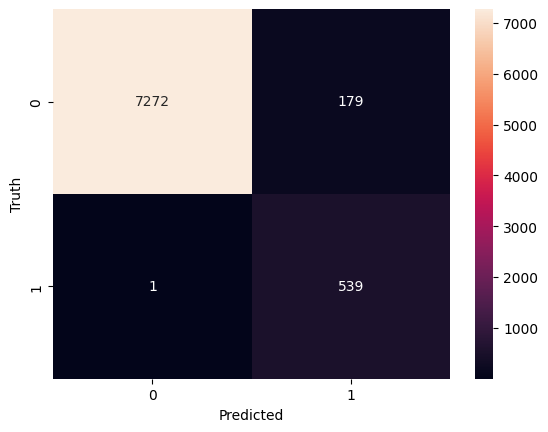

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')